In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
housing_costs_df = pd.read_csv('../Files/housingcosts.csv')
housing_costs_df.head()

,observation_date,MSPUS
0,1963-01-01,17800
1,1963-04-01,18000
2,1963-07-01,17900
3,1963-10-01,18500
4,1964-01-01,18500


In [8]:
housing_costs_df["Year"] = housing_costs_df["observation_date"].str[:4]
housing_costs_df.head()

,observation_date,MSPUS,Year
0,1963-01-01,17800,1963
1,1963-04-01,18000,1963
2,1963-07-01,17900,1963
3,1963-10-01,18500,1963
4,1964-01-01,18500,1964


<Axes: xlabel='Year'>

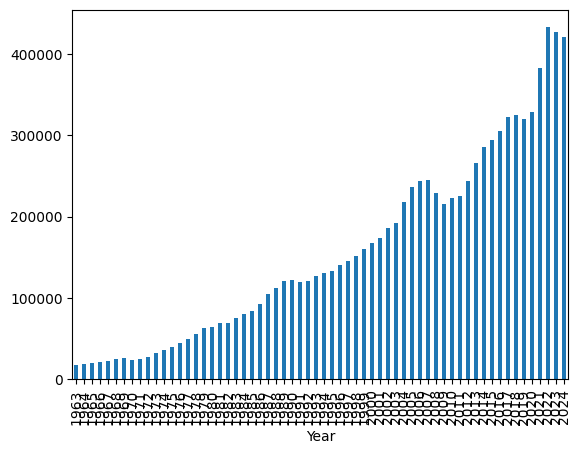

In [ ]:
housing_costs_df.groupby("Year")["MSPUS"].mean().plot(kind="line")

In [2]:
real_estate_df = pd.read_csv('../Files\Real_Estate_Sales_2001-2022_GL.csv')
real_estate_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\kitts\AppData\Local\Temp\ipykernel_25420\652842857.py:1: SyntaxWarning: invalid escape sequence '\R'
  real_estate_df = pd.read_csv('../Files\Real_Estate_Sales_2001-2022_GL.csv')
C:\Users\kitts\AppData\Local\Temp\ipykernel_25420\652842857.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_df = pd.read_csv('../Files\Real_Estate_Sales_2001-2022_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [3]:
real_estate_df.dropna(inplace=True)

In [5]:
real_estate_df["Price Above"] = real_estate_df["Sale Amount"] - real_estate_df["Assessed Value"]

In [14]:
# Calculate the quantiles for filtering
quantiles = real_estate_df.groupby("List Year")["Price Above"].quantile([0.05, 0.95]).unstack(level=1)

# Filter out the outliers
filtered_df = real_estate_df.groupby("List Year").apply(
    lambda x: x[(x["Price Above"] >= quantiles.loc[x.name, 0.05]) & (x["Price Above"] <= quantiles.loc[x.name, 0.95])]
).reset_index(drop=True)

filtered_df.head()

C:\Users\kitts\AppData\Local\Temp\ipykernel_25420\814389858.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = real_estate_df.groupby("List Year").apply(


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Price Above
0,160917,2016,07/31/2017,Danbury,30 NANCY DR,130800.0,90000.0,1.453333,Single Family,Single Family,25 - Other,J10092 / GOOD TRANSFER,"BELOW MARKET - 2017 REVAL MARKET VALUE = $206,700",POINT (-73.44151 41.41813),-40800.0
1,160705,2016,07/03/2017,East Hampton,8 MAIN ST,143500.0,100000.0,1.435000,Single Family,Single Family,26 - Rehabilitation Deferred,TOTAL REHABILATATION STILL IN PROGRESS PERMITS...,PER MLS NEEDS REHAB - CASH OF REHAB LOAN,POINT (-72.50581 41.58166),-43500.0
2,161020,2016,08/28/2017,Danbury,10 ASPEN WAY,191100.0,335000.0,0.570448,Single Family,Single Family,25 - Other,L04002,DUPLICATE ENTRY - SEE #161015,POINT (-73.42383 41.45119),143900.0
3,161021,2016,08/28/2017,Danbury,53 TUCKER ST #2703,235500.0,365000.0,0.645205,Condo,Condo,25 - Other,K16120-2703,DUPLICATE ENTRY - SEE #161016,POINT (-73.42957 41.38286),129500.0
4,161148,2016,09/27/2017,Hamden,20 BITTERSWEET AVE,166600.0,155000.0,1.074839,Single Family,Single Family,25 - Other,EXEC DEED,PER MLS NEEDS REHAB,POINT (-72.91028 41.4506),-11600.0


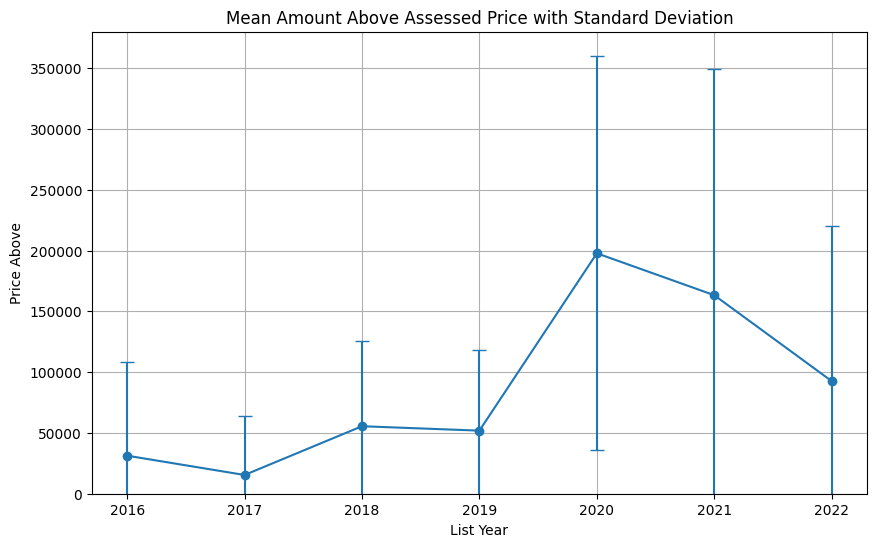

In [21]:
agg_df = filtered_df.groupby("List Year").agg({"Price Above": ["mean", "std"]})
agg_df.columns = ["mean", "std"]

plt.figure(figsize=(10, 6))
plt.errorbar(agg_df.index, agg_df["mean"], yerr=agg_df["std"], fmt='-o', capsize=5)
plt.xlabel("List Year")
plt.ylabel("Price Above")
plt.ylim(bottom=0)
plt.title("Mean Amount Above Assessed Price with Standard Deviation")
plt.grid(True)
plt.show()